## Load data and extract 3's and 7's

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import math


In [2]:
mnist = loadmat("mnist.mat")
data = mnist['mnist']
X_train = np.array(data[0][0][0])
X_test  = np.array(data[0][0][1])
Y_train = np.array(data[0][0][2])
Y_test = np.array(data[0][0][3])



In [3]:
tr_indices = [i for i in range(len(Y_train)) if Y_train[i]==3 or Y_train[i]==7]
Y_train = Y_train[tr_indices]
X_train = X_train[:,:,tr_indices]

te_indices = [i for i in range(len(Y_test)) if Y_test[i]==3 or Y_test[i]==7]
Y_test = Y_test[te_indices]
X_test = X_test[:,:,te_indices]

In [4]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(28, 28, 12396)
(12396, 1)
(28, 28, 2038)
(2038, 1)


## I hereby declare all 3's to be 0's and 7's to be 1's

In [5]:
Y_train = np.array([0 if i==3 else 1 for i in Y_train])
Y_test = np.array([0 if i==3 else 1 for i in Y_test])
X_train = X_train/X_train.max()
X_test = X_test/X_test.max()

## Only Gradient Descent

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
def predict(weights,X):
    z = np.sum((np.multiply(weights,X.T)),axis=(1,2))
    z = np.array([sigmoid(i) for i in z])
    return z

In [8]:
def NLL(predictions,targets):
    epsilon = 1e-5
    return -np.multiply((1/predictions.shape[0]),np.sum((np.multiply(targets,np.log(epsilon+ predictions)) + np.multiply((np.ones(targets.shape)-targets),(np.log(epsilon + np.ones(predictions.shape)-predictions))))))

In [9]:
def gradient(predictions,targets,inputs):
    return np.multiply((1/predictions.shape[0]),np.sum(np.multiply((predictions-targets),inputs),axis=2))

In [10]:
def weight_update(weights,gradient,eta):
    return -eta*gradient

In [13]:
def train(X_train,X_test,Y_train,Y_test,weights,epochs):
    eta = 0.2
    steps = 0
    train_errors = []
    test_errors = []
    best_loss = 1000
    best_test_loss = 1000
    best_weights = []
    gradients = []
    train_count = 0 #count to keep track of train loss improvement
    test_count = 0 #count to keep track of test loss improvement
    for i in range(0,epochs):
        steps += 1
        p_train = predict(weights,X_train)
        p_test = predict(weights,X_test)
        train_loss = NLL(p_train,Y_train)
        test_loss = NLL(p_test,Y_test)
        if test_loss > best_test_loss:
            test_count +=1
            #if test_count == 25:
            #    break
        else:
            best_test_loss = test_loss
            test_count = 0
            best_weights = weights
        if train_loss > best_loss:
            eta_count += 1
            if eta_count == 20:
                eta_count = 0
                eta *= 0.5
        else:
            best_loss = train_loss
            eta_count = 0
        train_errors.append(train_loss)
        test_errors.append(test_loss)
        grad = gradient(p_train,Y_train,X_train)
        gradients.append(grad)
        weights = weights + weight_update(weights,grad,eta)
    return p_train,p_test, train_errors,test_errors, best_weights, gradients, steps

In [14]:
import time
weights = np.random.standard_normal((28,28))
start = time.time()
p_train,p_test,train_errors,test_errors, best_weights,gradients,steps = train(X_train,X_test,Y_train,Y_test,weights,300)
end = time.time()
print(end - start)

31.251097917556763


In [15]:
n = np.arange(300)

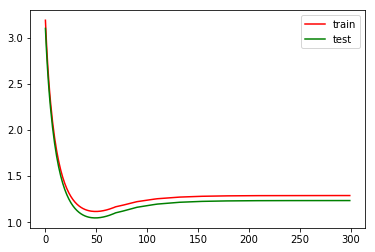

In [17]:
plt.plot(n,train_errors,color="red",label="train")
plt.plot(n,test_errors,color="green", label="test")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()
plt.show()

In [18]:
p_train = predict(best_weights,X_train)
p_test = predict(best_weights,X_test)

In [19]:
train_error = NLL(p_train,Y_train)
test_error = NLL(p_test,Y_test)

In [20]:
print(train_error)
print(test_error)

1.117471570941734
1.0477440812905532


## Add Momentum

In [25]:
def train(X_train,X_test,Y_train,Y_test,weights,epochs):
    eta = 0.2
    alpha = 0.01
    momentum = 0
    steps = 0
    train_errors = []
    test_errors = []
    best_loss = 1000
    best_test_loss = 1000
    best_weights = []
    gradients = []
    train_count = 0 #count to keep track of train loss improvement
    test_count = 0 #count to keep track of test loss improvement
    for i in range(0,epochs):
        steps += 1
        p_train = predict(weights,X_train)
        p_test = predict(weights,X_test)
        train_loss = NLL(p_train,Y_train)
        test_loss = NLL(p_test,Y_test)
        if test_loss > best_test_loss:
            test_count +=1
           # if test_count == 25:
           #     break
        else:
            best_test_loss = test_loss
            test_count = 0
            best_weights = weights
        if train_loss > best_loss:
            eta_count += 1
            if eta_count == 20:
                eta_count = 0
                eta *= 0.5
        else:
            best_loss = train_loss
            eta_count = 0
        train_errors.append(train_loss)
        test_errors.append(test_loss)
        grad = gradient(p_train,Y_train,X_train)
        wu = weight_update(weights,grad,eta)
        momentum = momentum + alpha*wu
        gradients.append(grad)
        weights = weights+( wu+momentum*alpha)
    return p_train,p_test,train_errors,test_errors, best_weights, gradients, steps, weights

In [26]:
import time
weights = np.random.standard_normal((28,28))
start = time.time()
p_train,p_test, train_errors,test_errors,best_weights,gradients,steps,weights = train(X_train,X_test,Y_train,Y_test,weights,300)
end = time.time()
print(end - start)

30.33324694633484


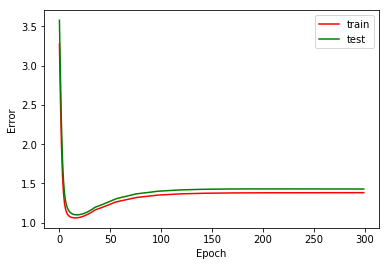

In [28]:
epochs = np.arange(300)
plt.plot(epochs,train_errors,color="red", label = "train")
plt.plot(epochs,test_errors,color="green",label = "test")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()
plt.show()

In [31]:
p_train = predict(best_weights,X_train)
p_test = predict(best_weights,X_test)

In [32]:
train_error = NLL(p_train,Y_train)
test_error = NLL(p_test,Y_test)

In [33]:
print(train_error)
print(test_error)

1.060975054192515
1.0994263861524123


## Weight decay 

In [34]:
def gradient(predictions,targets,inputs,lamda, w):
    grad = [np.multiply((predictions[n]-targets[n]),inputs[n]) + np.multiply((lamda/n),w) for n in predictions.shape[0]]
    return np.multiply((1/predictions.shape[0]),np.sum(grad,axis=2))

In [ ]:
def train(X_train,X_test,Y_train,Y_test,weights,epochs,lamda):
    eta = 0.2
    alpha = 0.01
    momentum = 0
    steps = 0
    train_errors = []
    test_errors = []
    best_loss = 1000
    best_test_loss = 1000
    best_weights = []
    gradients = []
    train_count = 0 #count to keep track of train loss improvement
    test_count = 0 #count to keep track of test loss improvement
    for i in range(0,epochs):
        steps += 1
        p_train = predict(weights,X_train)
        p_test = predict(weights,X_test)
        train_loss = NLL(p_train,Y_train)
        test_loss = NLL(p_test,Y_test)
        if test_loss > best_test_loss:
            test_count +=1
           # if test_count == 25:
           #     break
        else:
            best_test_loss = test_loss
            test_count = 0
            best_weights = weights
        if train_loss > best_loss:
            eta_count += 1
            if eta_count == 20:
                eta_count = 0
                eta *= 0.5
        else:
            best_loss = train_loss
            eta_count = 0
        train_errors.append(train_loss)
        test_errors.append(test_loss)
        grad = gradient(p_train,Y_train,X_train,lamda,)
        wu = weight_update(weights,grad,eta)
        momentum = momentum + alpha*wu
        gradients.append(grad)
        weights = weights+( wu+momentum*alpha)
    return p_train,p_test,train_errors,test_errors, best_weights, gradients, steps, weights

In [ ]:
import time
weights = np.random.standard_normal((28,28))
start = time.time()
p_train,p_test, train_errors,test_errors,best_weights,gradients,steps,weights = train(X_train,X_test,Y_train,Y_test,weights,300)
end = time.time()
print(end - start)

In [ ]:
epochs = np.arange(300)
plt.plot(epochs,train_errors,color="red", label = "train")
plt.plot(epochs,test_errors,color="green",label = "test")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()
plt.show()

In [ ]:
p_train = predict(best_weights,X_train)
p_test = predict(best_weights,X_test)
train_error = NLL(p_train,Y_train)
test_error = NLL(p_test,Y_test
print(train_error)
print(test_error)